In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [18]:
# load the dataset
df = pd.read_csv('Data_final.csv',usecols=[1])
df.head()

,Requests
0,137317594
1,133211380
2,149453070
3,148053372
4,153271739


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Requests  248 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [20]:
df.describe()

,Requests
count,2.480000e+02
mean,4.253206e+08
std,1.852987e+08
min,1.332114e+08
25%,2.538966e+08
50%,4.109500e+08
75%,5.942540e+08
max,7.808514e+08


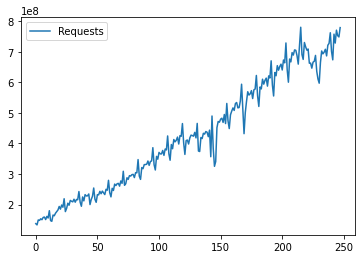

In [21]:
df.plot()

In [22]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

In [26]:
# After normalization of data
df

array([[0.00634027],
       [0.        ],
       [0.02507827],
       [0.02291704],
       [0.03097455],
       [0.02643306],
       [0.0379377 ],
       [0.03979098],
       [0.02713994],
       [0.04333359],
       [0.03500856],
       [0.07192771],
       [0.02181532],
       [0.01823284],
       [0.04993546],
       [0.04636453],
       [0.05922923],
       [0.06734099],
       [0.0756811 ],
       [0.093364  ],
       [0.07979551],
       [0.10060193],
       [0.08955341],
       [0.13242617],
       [0.06739136],
       [0.0833704 ],
       [0.10980722],
       [0.09961484],
       [0.1239209 ],
       [0.11965403],
       [0.11673619],
       [0.12989825],
       [0.11497534],
       [0.12869608],
       [0.12722703],
       [0.1687771 ],
       [0.11495231],
       [0.09433438],
       [0.14149919],
       [0.12166148],
       [0.15312442],
       [0.14643325],
       [0.14720094],
       [0.15648725],
       [0.10288993],
       [0.12888126],
       [0.14493328],
       [0.186

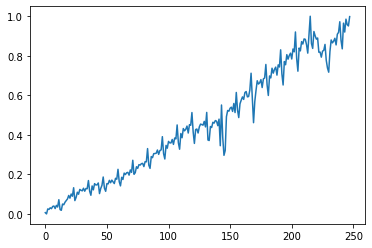

In [28]:
plt.plot(df)
plt.show()

In [30]:
df.shape

(248, 1)

In [39]:
# split into train and test sets
train_size = int(len(df) * 0.67)
test_size = len(df) - train_size
train, test = df[0:train_size,:], df[train_size:len(df),:]
print(len(train), len(test))

166 82


In [41]:
# convert an array of values into a dataset matrix
def create_dataset(df, look_back=1):
	dataX, dataY = [], []
	for i in range(len(df)-look_back-1):
		a = df[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(df[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [52]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(164, 1)
(164,)
(80, 1)
(80,)


In [53]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [54]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
164/164 - 0s - loss: 0.0832
Epoch 2/100
164/164 - 0s - loss: 0.0300
Epoch 3/100
164/164 - 0s - loss: 0.0216
Epoch 4/100
164/164 - 0s - loss: 0.0190
Epoch 5/100
164/164 - 0s - loss: 0.0163
Epoch 6/100
164/164 - 0s - loss: 0.0136
Epoch 7/100
164/164 - 0s - loss: 0.0112
Epoch 8/100
164/164 - 0s - loss: 0.0091
Epoch 9/100
164/164 - 0s - loss: 0.0073
Epoch 10/100
164/164 - 0s - loss: 0.0056
Epoch 11/100
164/164 - 0s - loss: 0.0044
Epoch 12/100
164/164 - 0s - loss: 0.0035
Epoch 13/100
164/164 - 0s - loss: 0.0030
Epoch 14/100
164/164 - 0s - loss: 0.0026
Epoch 15/100
164/164 - 0s - loss: 0.0024
Epoch 16/100
164/164 - 0s - loss: 0.0023
Epoch 17/100
164/164 - 0s - loss: 0.0022
Epoch 18/100
164/164 - 0s - loss: 0.0022
Epoch 19/100
164/164 - 0s - loss: 0.0022
Epoch 20/100
164/164 - 0s - loss: 0.0022
Epoch 21/100
164/164 - 0s - loss: 0.0022
Epoch 22/100
164/164 - 0s - loss: 0.0022
Epoch 23/100
164/164 - 0s - loss: 0.0022
Epoch 24/100
164/164 - 0s - loss: 0.0022
Epoch 25/100
164/164 - 0s

In [55]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 29023391.42 RMSE
Test Score: 54827260.81 RMSE


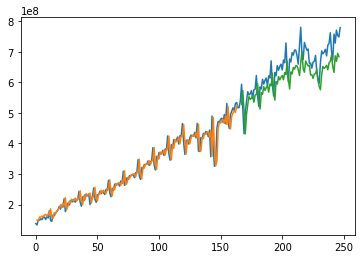

In [58]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

The data is plotted, showing the original dataset in blue, the predictions for the training dataset in Orange, and the predictions on the unseen test dataset in green.